### Importing Libraries

In [1]:
#Importing Pandas and NumPy
import pandas as pd
import numpy as np

#Importing seaborn
import seaborn as sns

#Importing matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

#Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding Data

In [2]:
#Reading the data
data = pd.read_csv("D:\Data Science\Machine Learning\CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#Checking the dimension of dataframe
data.shape

(205, 26)

In [4]:
#Checking the statistical aspects of dataframe
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
#Checking the type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
#No null values found from above, checking for duplicate values
data.duplicated().unique()

array([False])

### Data Preparation

Since in the question its given to consider the company name as independent variable, we first split the CarName and store the company Name in another dummy variable and drop the orginal variable

In [7]:
#Splitting the CarName into dummy variable
data['companyname']=data['CarName'].apply(lambda x:(x.split(' ')[0]))

#Dropping the variable CarName
data=data.drop(['CarName'],axis='columns')

data

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [8]:
data['companyname'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
#Merging the mispelled Company Names
data['companyname'].replace('maxda','mazda',inplace=True)
data['companyname'].replace('Nissan','nissan',inplace=True)
data['companyname'].replace('porcshce','porsche',inplace=True)
data['companyname'].replace('toyouta','toyota',inplace=True)
data['companyname'].replace(['vokswagen','vw'],'volkswagen',inplace=True)

data['companyname'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

From the information we can drop car_ID as it has no relation in determining the car price

In [10]:
data.drop(['car_ID'],axis = 1, inplace = True)

In [11]:
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


To create a regression line, we need numeric data. Therefore, we create dummy variable for categorical variables with more than 2 levels.

In [12]:
#Creating dummy variables for categorical variables and dropping the first column
dummies = pd.get_dummies(data[['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','companyname']],drop_first = True)

#Merging the results to orginal dataframe
data = pd.concat([data,dummies],axis=1)

#Dropping the orginal variables from dataframe
data.drop(['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','companyname'],axis = 1, inplace = True)

In [13]:
data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,companyname_nissan,companyname_peugeot,companyname_plymouth,companyname_porsche,companyname_renault,companyname_saab,companyname_subaru,companyname_toyota,companyname_volkswagen,companyname_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   wheelbase               205 non-null    float64
 2   carlength               205 non-null    float64
 3   carwidth                205 non-null    float64
 4   carheight               205 non-null    float64
 5   curbweight              205 non-null    int64  
 6   enginesize              205 non-null    int64  
 7   boreratio               205 non-null    float64
 8   stroke                  205 non-null    float64
 9   compressionratio        205 non-null    float64
 10  horsepower              205 non-null    int64  
 11  peakrpm                 205 non-null    int64  
 12  citympg                 205 non-null    int64  
 13  highwaympg              205 non-null    int64  
 14  price                   205 non-null    fl

### Feature Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
# Apply scaler() to all the columns except for dummy variables
num_var = ['symboling','horsepower','wheelbase','curbweight', 'enginesize', 'boreratio','stroke','compressionratio','carlength','carwidth','carheight','peakrpm','citympg','highwaympg','price']

data[num_var] = scaler.fit_transform(data[num_var])
data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,companyname_nissan,companyname_peugeot,companyname_plymouth,companyname_porsche,companyname_renault,companyname_saab,companyname_subaru,companyname_toyota,companyname_volkswagen,companyname_volvo
0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,...,0,0,0,0,0,0,0,0,0,0
2,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,...,0,0,0,0,0,0,0,0,0,0
3,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,...,0,0,0,0,0,0,0,0,0,0
4,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,...,0,0,0,0,0,0,0,0,0,0


### Splitting Data into Test and Training Data

In [18]:
# Importing library for splitting
from sklearn.model_selection import train_test_split

In [19]:
#Independent variables
X = data.drop('price',axis = 1)

X.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,companyname_nissan,companyname_peugeot,companyname_plymouth,companyname_porsche,companyname_renault,companyname_saab,companyname_subaru,companyname_toyota,companyname_volkswagen,companyname_volvo
0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,...,0,0,0,0,0,0,0,0,0,0
2,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,...,0,0,0,0,0,0,0,0,0,0
3,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,...,0,0,0,0,0,0,0,0,0,0
4,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#Dependent variable
Y = data.price

Y.head()

0    0.207959
1    0.282558
2    0.282558
3    0.219254
4    0.306142
Name: price, dtype: float64

In [21]:
# Splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

### Correlation Matrix

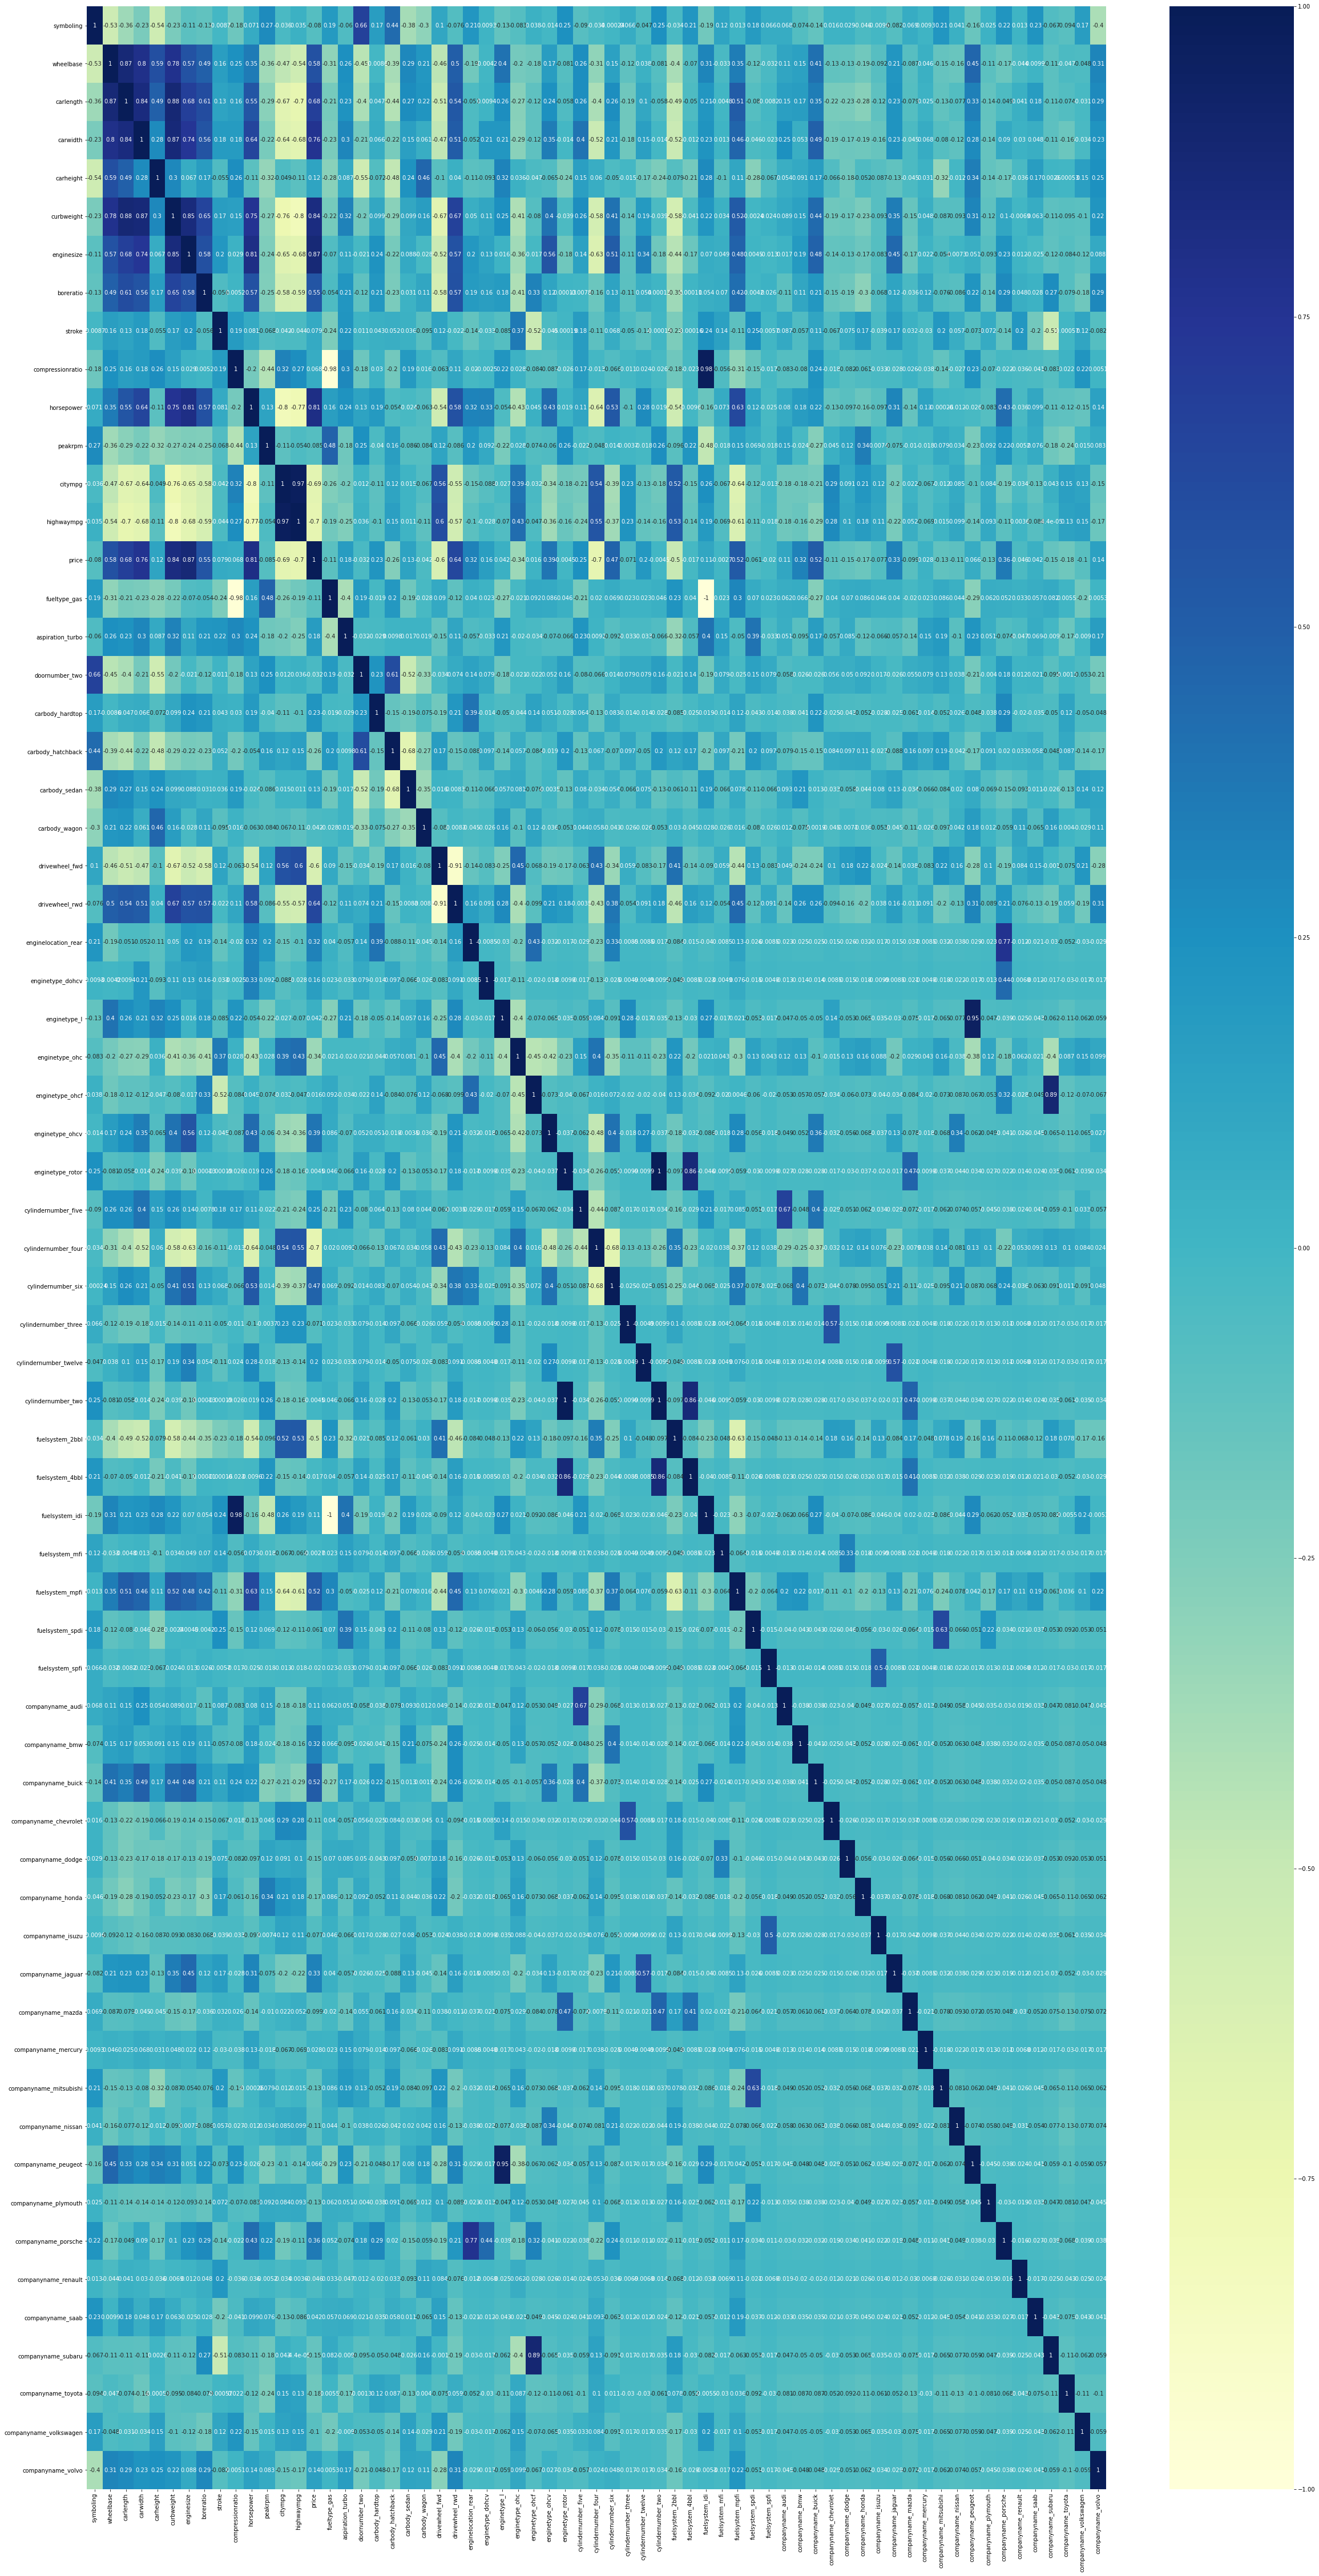

In [22]:
# Checking correlation coeffiecients to see which variables are highly correlted

plt.figure(figsize = (40,80))
sns.heatmap(data.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

### Model Building

In [23]:
import statsmodels.api as sm

# Add a constant otherwise it will be straight line from zero
X_train_mlr = sm.add_constant(X_train)

# Create a first fitted model
mlr_1 = sm.OLS(Y_train, X_train_mlr).fit()

In [24]:
mlr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     57.59
Date:                Mon, 16 May 2022   Prob (F-statistic):           1.40e-49
Time:                        16:09:41   Log-Likelihood:                 295.32
No. Observations:                 143   AIC:                            -474.6
Df Residuals:                      85   BIC:                            -302.8
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0960      0.136     -0.704      0.483      -0.367       0.175
symboling                 -0.0089      0.033     -0.265      0.792      -0.075       0.058
wheelbase                  0.2517      0.099      2.542      0.013       0.055       0.449
carlength                 -0.1715      0.098     -1.747      0.084      -0.367       0.024
carwidth                   0.2334      0.090      2.581      0.012       0.054       0.413
carheight                 -0.1682      0.050     -3.341      0.001      -0.268      -0.068
curbweight                 0.2958      0.117      2.521      0.014       0.063       0.529
enginesize                 1.8066      0.417      4.333      0.000       0.978       2.635
boreratio                 -0.6205      0.170     -3.660      0.000      -0.958      -0.283
stroke                    -0.1728      0.079     -2.174      0.032      -0.331      -0.015
compressionratio          -0.3246      0.243     -1.334      0.186      -0.808       0.159
horsepower                -0.1802      0.188     -0.958      0.341      -0.554       0.194
peakrpm                    0.1688      0.046      3.688      0.000       0.078       0.260
citympg                   -0.0463      0.138     -0.335      0.738      -0.321       0.228
highwaympg                 0.1175      0.128      0.918      0.361      -0.137       0.372
fueltype_gas              -0.1716      0.083     -2.064      0.042      -0.337      -0.006
aspiration_turbo           0.0729      0.026      2.778      0.007       0.021       0.125
doornumber_two            -0.0114      0.014     -0.841      0.403      -0.038       0.016
carbody_hardtop           -0.0873      0.051     -1.704      0.092      -0.189       0.015
carbody_hatchback         -0.0951      0.040     -2.386      0.019      -0.174      -0.016
carbody_sedan             -0.0779      0.042     -1.838      0.070      -0.162       0.006
carbody_wagon             -0.0608      0.045     -1.343      0.183      -0.151       0.029
drivewheel_fwd            -0.0031      0.022     -0.140      0.889      -0.047       0.041
drivewheel_rwd             0.0236      0.031      0.757      0.451      -0.038       0.086
enginelocation_rear        0.1779      0.062      2.890      0.005       0.056       0.300
enginetype_dohcv           0.2137      0.151      1.415      0.161      -0.087       0.514
enginetype_l               0.1861      0.074      2.528      0.013       0.040       0.332
enginetype_ohc             0.0009      0.040      0.023      0.981      -0.079       0.081
enginetype_ohcf            0.1487      0.037      4.032      0.000       0.075       0.222
enginetype_ohcv           -0.0247      0.035     -0.702      0.485      -0.095       0.045
enginetype_rotor           0.3559      0.104      3.438      0.001       0.150  

### Feature Selection using RFE 

In [25]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
#Init the transformer
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=15)

#Fit to the training data
rfe = rfe.fit(X_train_mlr, Y_train)

In [26]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('symboling', False, 51),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', True, 1),
 ('fueltype_gas', True, 1),
 ('aspiration_turbo', False, 15),
 ('doornumber_two', False, 3),
 ('carbody_hardtop', False, 14),
 ('carbody_hatchback', False, 30),
 ('carbody_sedan', False, 9),
 ('carbody_wagon', False, 6),
 ('drivewheel_fwd', False, 18),
 ('drivewheel_rwd', False, 7),
 ('enginelocation_rear', False, 2),
 ('enginetype_dohcv', False, 45),
 ('enginetype_l', False, 47),
 ('enginetype_ohc', False, 43),
 ('enginetype_ohcf', False, 5),
 ('enginetype_ohcv', False, 36),
 ('enginetype_rotor', False, 22),
 ('cylindernumber_five', False, 39),
 ('cylindernumber_four', False, 17),
 ('cylindernumber_six', False, 8),
 ('cylindernumber_thr

In [27]:
rfe.support_[1:]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [28]:
col = X_train.columns[rfe.support_[1:]]
col

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'companyname_bmw'],
      dtype='object')

In [29]:
X_train.columns[~rfe.support_[1:]]

Index(['fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'companyname_audi',
       'companyname_buick', 'companyname_chevrolet', 'companyname_dodge',
       'companyname_honda', 'companyname_isuzu', 'companyname_jaguar',
       'companyname_mazda', 'companyname_mercury', 'companyname_mitsubishi',
       'companyname_nissan', 'companyname_peugeot', 'companyname_plymouth',
       'companyname_porsche', 'companyname_renault

#### Updating the model after dropping features

In [30]:
# Building the second model
X_train_mlr_1 = sm.add_constant(X_train[col])
mlr_2 = sm.OLS(Y_train, X_train_mlr_1).fit()
mlr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     70.10
Date:                Mon, 16 May 2022   Prob (F-statistic):           7.15e-54
Time:                        16:10:48   Log-Likelihood:                 191.52
No. Observations:                 143   AIC:                            -351.0
Df Residuals:                     127   BIC:                            -303.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1708      0.075     -2.287      0.024      -0.319      -0.023
symboling            0.0374      0.033      1.138      0.257      -0.028       0.102
wheelbase           -0.0111      0.095     -0.116      0.908      -0.199       0.177
carlength           -0.1715      0.095     -1.802      0.074      -0.360       0.017
carwidth             0.3002      0.078      3.838      0.000       0.145       0.455
carheight            0.0162      0.043      0.380      0.705      -0.068       0.101
curbweight           0.3516      0.117      3.012      0.003       0.121       0.583
enginesize           0.4706      0.105      4.490      0.000       0.263       0.678
boreratio           -0.0263      0.046     -0.572      0.568      -0.117       0.065
stroke              -0.0940      0.046     -2.053      0.042      -0.185      -0.003
compressionratio     0.0911      0.036      2.533      0.013       0.020       0.162
horsepower           0.0978      0.101      0.968      0.335      -0.102       0.298
peakrpm              0.1253      0.042      2.952      0.004       0.041       0.209
citympg              0.0010      0.168      0.006      0.995      -0.331       0.333
highwaympg          -0.0059      0.161     -0.037      0.971      -0.324       0.312
companyname_bmw      0.2308      0.031      7.351      0.000       0.169       0.293
==============================================================================
Omnibus:                       25.927   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.121
Skew:                           0.769   Prob(JB):                     1.07e-12
Kurtosis:                       5.624   Cond. No.                         77.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIFs

In [31]:
#Importing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,highwaympg,150.10
12,citympg,128.23
5,curbweight,84.43
2,carlength,72.97
3,carwidth,47.74
1,wheelbase,43.09
6,enginesize,28.17
10,horsepower,25.38
8,stroke,20.37
7,boreratio,19.33


There are variables with very high VIF. We check the VIF along with their p value. In the first case highwaympg has the highest VIF and p-value. So, drop highwaympg.

In [33]:
col = col.drop('highwaympg', 1)
col

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'companyname_bmw'],
      dtype='object')

#### Updating the model after dropping features

In [34]:
#Building the third model
X_train_mlr_1 = sm.add_constant(X_train[col])
mlr_3 = sm.OLS(Y_train, X_train_mlr_1).fit()
mlr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     75.69
Date:                Mon, 16 May 2022   Prob (F-statistic):           8.05e-55
Time:                        16:14:39   Log-Likelihood:                 191.52
No. Observations:                 143   AIC:                            -353.0
Df Residuals:                     128   BIC:                            -308.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1712      0.074     -2.316      0.022      -0.317      -0.025
symboling            0.0374      0.033      1.142      0.255      -0.027       0.102
wheelbase           -0.0105      0.094     -0.112      0.911      -0.196       0.175
carlength           -0.1722      0.093     -1.843      0.068      -0.357       0.013
carwidth             0.3002      0.078      3.853      0.000       0.146       0.454
carheight            0.0163      0.042      0.384      0.702      -0.068       0.100
curbweight           0.3525      0.113      3.110      0.002       0.128       0.577
enginesize           0.4710      0.104      4.539      0.000       0.266       0.676
boreratio           -0.0265      0.045     -0.586      0.559      -0.116       0.063
stroke              -0.0944      0.044     -2.135      0.035      -0.182      -0.007
compressionratio     0.0911      0.036      2.546      0.012       0.020       0.162
horsepower           0.0971      0.099      0.985      0.326      -0.098       0.292
peakrpm              0.1254      0.042      2.972      0.004       0.042       0.209
citympg             -0.0045      0.076     -0.059      0.953      -0.156       0.147
companyname_bmw      0.2307      0.031      7.442      0.000       0.169       0.292
==============================================================================
Omnibus:                       25.870   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.922
Skew:                           0.768   Prob(JB):                     1.19e-12
Kurtosis:                       5.619   Cond. No.                         47.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#Checking the VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,curbweight,81.06
2,carlength,69.91
3,carwidth,47.74
1,wheelbase,41.89
6,enginesize,27.73
10,horsepower,24.19
8,stroke,18.59
7,boreratio,18.54
4,carheight,14.91
12,citympg,11.85


Though curbweight has very high VIF, their p-value is closer to zero. Hence we go for the next feature with high VIF and p-value ie carlength

In [36]:
col = col.drop('carlength', 1)
col

Index(['symboling', 'wheelbase', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'companyname_bmw'],
      dtype='object')

#### Updating the model after dropping features

In [37]:
#Building the fourth model
X_train_mlr_1 = sm.add_constant(X_train[col])
mlr_4 = sm.OLS(Y_train, X_train_mlr_1).fit()
mlr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     79.77
Date:                Mon, 16 May 2022   Prob (F-statistic):           4.62e-55
Time:                        16:17:23   Log-Likelihood:                 189.65
No. Observations:                 143   AIC:                            -351.3
Df Residuals:                     129   BIC:                            -309.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2046      0.072     -2.830      0.005      -0.348      -0.062
symboling            0.0406      0.033      1.229      0.221      -0.025       0.106
wheelbase           -0.0690      0.089     -0.776      0.439      -0.245       0.107
carwidth             0.2689      0.077      3.503      0.001       0.117       0.421
carheight           -0.0013      0.042     -0.032      0.975      -0.084       0.081
curbweight           0.3156      0.113      2.803      0.006       0.093       0.538
enginesize           0.4576      0.104      4.381      0.000       0.251       0.664
boreratio           -0.0433      0.045     -0.967      0.335      -0.132       0.045
stroke              -0.0966      0.045     -2.165      0.032      -0.185      -0.008
compressionratio     0.0904      0.036      2.505      0.014       0.019       0.162
horsepower           0.1240      0.098      1.261      0.210      -0.071       0.319
peakrpm              0.1264      0.043      2.969      0.004       0.042       0.211
citympg              0.0372      0.074      0.505      0.615      -0.109       0.183
companyname_bmw      0.2262      0.031      7.255      0.000       0.165       0.288
==============================================================================
Omnibus:                       22.988   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.608
Skew:                           0.706   Prob(JB):                     1.25e-10
Kurtosis:                       5.380   Cond. No.                         45.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#Checking the VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,curbweight,75.92
2,carwidth,45.35
1,wheelbase,37.18
5,enginesize,27.68
9,horsepower,23.78
7,stroke,18.32
6,boreratio,16.50
3,carheight,13.67
11,citympg,11.49
0,symboling,10.27


Though curbweight and carwidth has high VIF, they have low p value. Dropping next feature with high VIF and p-value,ie wheelbase

In [39]:
col = col.drop('wheelbase', 1)
col

Index(['symboling', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'companyname_bmw'],
      dtype='object')

#### Updating the model after dropping features

In [40]:
#Building the fifth model
X_train_mlr_1 = sm.add_constant(X_train[col])
mlr_5 = sm.OLS(Y_train, X_train_mlr_1).fit()
mlr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     86.63
Date:                Mon, 16 May 2022   Prob (F-statistic):           6.53e-56
Time:                        16:19:46   Log-Likelihood:                 189.32
No. Observations:                 143   AIC:                            -352.6
Df Residuals:                     130   BIC:                            -314.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2061      0.072     -2.856      0.005      -0.349      -0.063
symboling            0.0505      0.030      1.660      0.099      -0.010       0.111
carwidth             0.2396      0.067      3.589      0.000       0.108       0.372
carheight           -0.0087      0.041     -0.215      0.830      -0.089       0.072
curbweight           0.2807      0.103      2.723      0.007       0.077       0.485
enginesize           0.4618      0.104      4.433      0.000       0.256       0.668
boreratio           -0.0446      0.045     -1.000      0.319      -0.133       0.044
stroke              -0.1005      0.044     -2.272      0.025      -0.188      -0.013
compressionratio     0.0915      0.036      2.541      0.012       0.020       0.163
horsepower           0.1512      0.092      1.648      0.102      -0.030       0.333
peakrpm              0.1232      0.042      2.911      0.004       0.039       0.207
citympg              0.0381      0.074      0.518      0.605      -0.107       0.184
companyname_bmw      0.2206      0.030      7.287      0.000       0.161       0.280
==============================================================================
Omnibus:                       22.484   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.385
Skew:                           0.683   Prob(JB):                     1.40e-10
Kurtosis:                       5.398   Cond. No.                         43.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#Checking the VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,curbweight,62.08
1,carwidth,34.35
4,enginesize,27.60
8,horsepower,20.77
6,stroke,18.00
5,boreratio,16.44
2,carheight,12.86
10,citympg,11.49
9,peakrpm,9.40
0,symboling,8.50


Dropping horsepower with high VIF and p-value

In [42]:
col = col.drop('horsepower', 1)
col

Index(['symboling', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'citympg',
       'companyname_bmw'],
      dtype='object')

#### Updating model after dropping features 

In [43]:
#Building the sixth model
X_train_mlr_1 = sm.add_constant(X_train[col])
mlr_6 = sm.OLS(Y_train, X_train_mlr_1).fit()
mlr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     93.04
Date:                Mon, 16 May 2022   Prob (F-statistic):           2.50e-56
Time:                        16:21:22   Log-Likelihood:                 187.84
No. Observations:                 143   AIC:                            -351.7
Df Residuals:                     131   BIC:                            -316.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2002      0.073     -2.760      0.007      -0.344      -0.057
symboling            0.0542      0.031      1.777      0.078      -0.006       0.115
carwidth             0.2484      0.067      3.707      0.000       0.116       0.381
carheight           -0.0259      0.039     -0.655      0.513      -0.104       0.052
curbweight           0.3032      0.103      2.948      0.004       0.100       0.507
enginesize           0.5514      0.089      6.165      0.000       0.374       0.728
boreratio           -0.0383      0.045     -0.856      0.393      -0.127       0.050
stroke              -0.1117      0.044     -2.537      0.012      -0.199      -0.025
compressionratio     0.0871      0.036      2.411      0.017       0.016       0.159
peakrpm              0.1530      0.038      3.977      0.000       0.077       0.229
citympg              0.0131      0.072      0.181      0.857      -0.130       0.156
companyname_bmw      0.2229      0.030      7.323      0.000       0.163       0.283
==============================================================================
Omnibus:                       26.032   Durbin-Watson:                   2.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.448
Skew:                           0.757   Prob(JB):                     3.35e-13
Kurtosis:                       5.711   Cond. No.                         41.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#Checking the VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,curbweight,60.51
1,carwidth,34.11
4,enginesize,20.13
6,stroke,17.62
5,boreratio,16.19
2,carheight,12.03
9,citympg,10.75
0,symboling,8.40
8,peakrpm,7.16
7,compressionratio,3.21


Dropping boreratio with high VIF and p-value

In [45]:
col = col.drop('boreratio', 1)
col

Index(['symboling', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'stroke', 'compressionratio', 'peakrpm', 'citympg', 'companyname_bmw'],
      dtype='object')

#### Updating model after dropping feature

In [46]:
#Building the seventh model
X_train_mlr_1 = sm.add_constant(X_train[col])
mlr_7 = sm.OLS(Y_train, X_train_mlr_1).fit()
mlr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     102.5
Date:                Mon, 16 May 2022   Prob (F-statistic):           3.45e-57
Time:                        16:22:22   Log-Likelihood:                 187.44
No. Observations:                 143   AIC:                            -352.9
Df Residuals:                     132   BIC:                            -320.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2294      0.064     -3.585      0.000      -0.356      -0.103
symboling            0.0530      0.030      1.740      0.084      -0.007       0.113
carwidth             0.2394      0.066      3.621      0.000       0.109       0.370
carheight           -0.0259      0.039     -0.657      0.513      -0.104       0.052
curbweight           0.3008      0.103      2.928      0.004       0.098       0.504
enginesize           0.5465      0.089      6.129      0.000       0.370       0.723
stroke              -0.0975      0.041     -2.393      0.018      -0.178      -0.017
compressionratio     0.0844      0.036      2.348      0.020       0.013       0.156
peakrpm              0.1609      0.037      4.313      0.000       0.087       0.235
citympg              0.0263      0.071      0.372      0.710      -0.113       0.166
companyname_bmw      0.2241      0.030      7.379      0.000       0.164       0.284
==============================================================================
Omnibus:                       21.888   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.354
Skew:                           0.681   Prob(JB):                     6.35e-10
Kurtosis:                       5.292   Cond. No.                         39.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
#Checking the VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,curbweight,57.23
1,carwidth,32.47
4,enginesize,20.12
5,stroke,16.52
2,carheight,11.75
8,citympg,10.12
0,symboling,7.45
7,peakrpm,7.16
6,compressionratio,3.18
9,companyname_bmw,1.19


Dropping carheight with high VIF and p-value

In [48]:
col = col.drop('carheight', 1)
col

Index(['symboling', 'carwidth', 'curbweight', 'enginesize', 'stroke',
       'compressionratio', 'peakrpm', 'citympg', 'companyname_bmw'],
      dtype='object')

#### Updating model after dropping feature 

In [49]:
#Building the eighth model
X_train_mlr_1 = sm.add_constant(X_train[col])
mlr_8 = sm.OLS(Y_train, X_train_mlr_1).fit()
mlr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     114.3
Date:                Mon, 16 May 2022   Prob (F-statistic):           3.87e-58
Time:                        16:23:29   Log-Likelihood:                 187.21
No. Observations:                 143   AIC:                            -354.4
Df Residuals:                     133   BIC:                            -324.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2426      0.061     -4.002      0.000      -0.362      -0.123
symboling            0.0614      0.028      2.233      0.027       0.007       0.116
carwidth             0.2375      0.066      3.603      0.000       0.107       0.368
curbweight           0.2784      0.097      2.879      0.005       0.087       0.470
enginesize           0.5729      0.079      7.211      0.000       0.416       0.730
stroke              -0.0975      0.041     -2.398      0.018      -0.178      -0.017
compressionratio     0.0860      0.036      2.399      0.018       0.015       0.157
peakrpm              0.1652      0.037      4.508      0.000       0.093       0.238
citympg              0.0199      0.070      0.285      0.776      -0.118       0.158
companyname_bmw      0.2207      0.030      7.390      0.000       0.162       0.280
==============================================================================
Omnibus:                       19.353   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.972
Skew:                           0.627   Prob(JB):                     2.55e-08
Kurtosis:                       5.073   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#Checking the VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,40.98
1,carwidth,32.11
4,stroke,16.42
3,enginesize,15.12
6,peakrpm,7.13
0,symboling,6.70
7,citympg,6.43
5,compressionratio,3.04
8,companyname_bmw,1.13


Dropping citympg with high VIF and p-value

In [51]:
col = col.drop('citympg', 1)
col

Index(['symboling', 'carwidth', 'curbweight', 'enginesize', 'stroke',
       'compressionratio', 'peakrpm', 'companyname_bmw'],
      dtype='object')

#### Updating the model after dropping features

In [52]:
#Building the ninth model
X_train_mlr_1 = sm.add_constant(X_train[col])
mlr_9 = sm.OLS(Y_train, X_train_mlr_1).fit()
mlr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     129.5
Date:                Mon, 16 May 2022   Prob (F-statistic):           3.42e-59
Time:                        16:25:14   Log-Likelihood:                 187.16
No. Observations:                 143   AIC:                            -356.3
Df Residuals:                     134   BIC:                            -329.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2279      0.032     -7.174      0.000      -0.291      -0.165
symboling            0.0591      0.026      2.260      0.025       0.007       0.111
carwidth             0.2356      0.065      3.605      0.000       0.106       0.365
curbweight           0.2606      0.074      3.541      0.001       0.115       0.406
enginesize           0.5781      0.077      7.507      0.000       0.426       0.730
stroke              -0.0970      0.040     -2.396      0.018      -0.177      -0.017
compressionratio     0.0919      0.029      3.166      0.002       0.034       0.149
peakrpm              0.1626      0.035      4.595      0.000       0.093       0.233
companyname_bmw      0.2197      0.030      7.436      0.000       0.161       0.278
==============================================================================
Omnibus:                       19.081   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.786
Skew:                           0.626   Prob(JB):                     4.61e-08
Kurtosis:                       5.025   Cond. No.                         26.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#Checking the VIFs again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,35.63
1,carwidth,31.56
3,enginesize,15.09
4,stroke,12.60
6,peakrpm,6.98
0,symboling,6.34
5,compressionratio,2.36
7,companyname_bmw,1.13


Since p-values are all in range, we will be making predictions in this training set

### Residual Analysis

To check if the error terms are normally distributed.

In [54]:
Y_train_price = mlr_9.predict(X_train_mlr_1)

In [56]:
Y_train_price.head()

122    0.077896
125    0.370946
166    0.172796
1      0.203226
199    0.254713
dtype: float64

Text(0.5, 0, 'Errors')

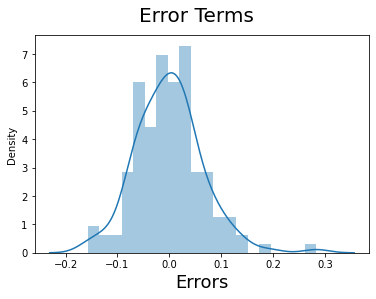

In [57]:
#Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train - Y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions based on Model

In [58]:
x_test_try = sm.add_constant(X_test[col])

In [59]:
y_prediction = mlr_9.predict(x_test_try)

In [60]:
y_prediction.head()

160    0.028528
186    0.128824
59     0.144415
165    0.169258
140    0.066687
dtype: float64

### Predicted Values

In [70]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':y_prediction,'Difference':Y_test-y_prediction})
pred_df.head()

,Actual Value,Predicted Value,Difference
160,0.065041,0.028528,0.036513
186,0.083834,0.128824,-0.044990
59,0.092523,0.144415,-0.051892
165,0.103768,0.169258,-0.065489
140,0.061690,0.066687,-0.004997


### Model Evaluation

In [71]:
#Checking the accuracy of the test data
from sklearn.metrics import r2_score
score = r2_score(Y_test,y_prediction)
score

0.821939463293434

### Plotting results

Text(0, 0.5, 'y_pred')

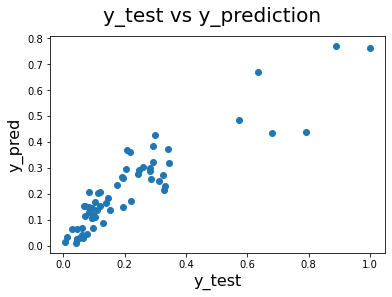

In [72]:
#Plotting the graph between actual price vs predicted values
fig = plt.figure()
plt.scatter(Y_test, y_prediction)
fig.suptitle('y_test vs y_prediction', fontsize = 20) # Plot heading 
plt.xlabel('y_test', fontsize = 16) # X-label
plt.ylabel('y_pred', fontsize = 16)  # Y-Label

<AxesSubplot:xlabel='price'>

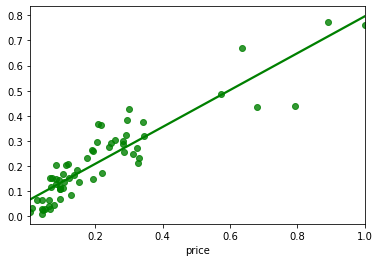

In [73]:
#Plotting the regression line
sns.regplot(x=Y_test,y=y_prediction,ci=None,color ='green')

Therefore the model is built with important features that helps in predicting the price of a car and the accuracy of the test data set is found to be 82.19%

The equation of the best fitted line is:
price = -0.2279 + 0.0591*symboling + 0.2356*carwidth + 0.2606*curbweight + 0.5781*enginesize - 0.0970*stroke +    0.0919*compressionratio + 0.1626*peakrpm + 0.2197*companyname_bmw